In [1]:
import numpy as np
import tensorflow as tf

from data import create_data_gaussian, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_n, plot_n_ratio, plot_w, plot_w2, plot_training

bins = np.arange(-3, 3, 0.1)

In [2]:
data = pos, neg, pos_weights, neg_weights = create_data_gaussian(10_000_000, neg_frac=0.25, neg_scale=0.5)

Epoch 1/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 39s 767us/step - accuracy: 0.5000 - loss: 0.4535 - val_accuracy: 0.5001 - val_loss: 0.4536
Epoch 2/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 39s 773us/step - accuracy: 0.5000 - loss: 0.4529 - val_accuracy: 0.5001 - val_loss: 0.4534
Epoch 3/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 38s 755us/step - accuracy: 0.5001 - loss: 0.4531 - val_accuracy: 0.5000 - val_loss: 0.4531
Epoch 4/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 40s 786us/step - accuracy: 0.5000 - loss: 0.4527 - val_accuracy: 0.5000 - val_loss: 0.4531
Epoch 5/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 40s 794us/step - accuracy: 0.5002 - loss: 0.4527 - val_accuracy: 0.5002 - val_loss: 0.4530


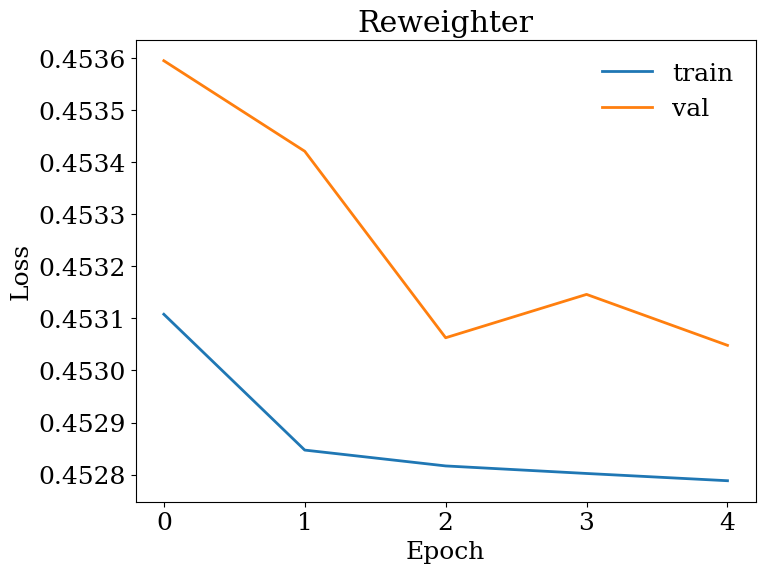

In [3]:
reweighter = simple_model()
reweighter.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter")

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 20s 800us/step - accuracy: 0.7497 - loss: 0.5005 - val_accuracy: 0.7507 - val_loss: 0.4985
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 20s 792us/step - accuracy: 0.7496 - loss: 0.4996 - val_accuracy: 0.7507 - val_loss: 0.4983
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 20s 802us/step - accuracy: 0.7500 - loss: 0.4992 - val_accuracy: 0.7507 - val_loss: 0.4984
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 20s 787us/step - accuracy: 0.7498 - loss: 0.4992 - val_accuracy: 0.7507 - val_loss: 0.4982
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 20s 801us/step - accuracy: 0.7497 - loss: 0.4994 - val_accuracy: 0.7507 - val_loss: 0.4983


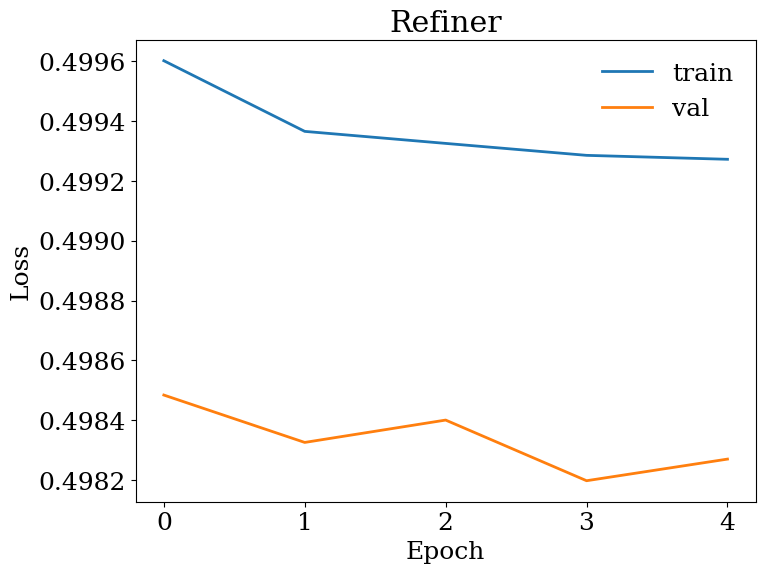

In [4]:
refiner = simple_model()
refiner.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner")

In [5]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


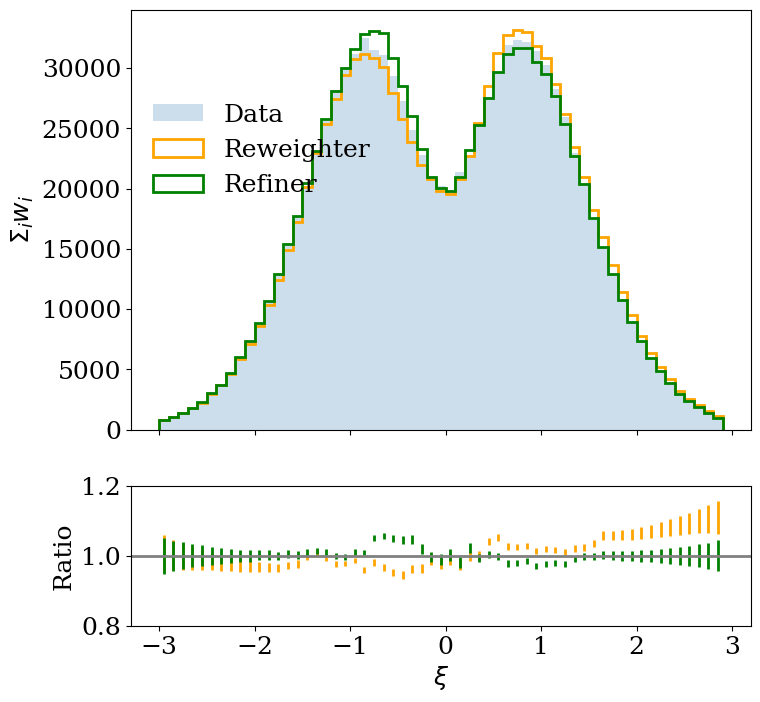

In [6]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins)

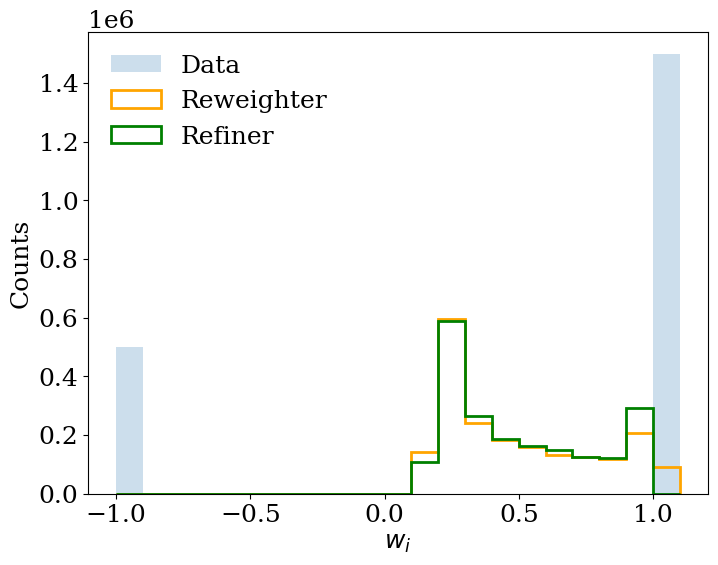

In [7]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(-1, 1.2, 0.1))

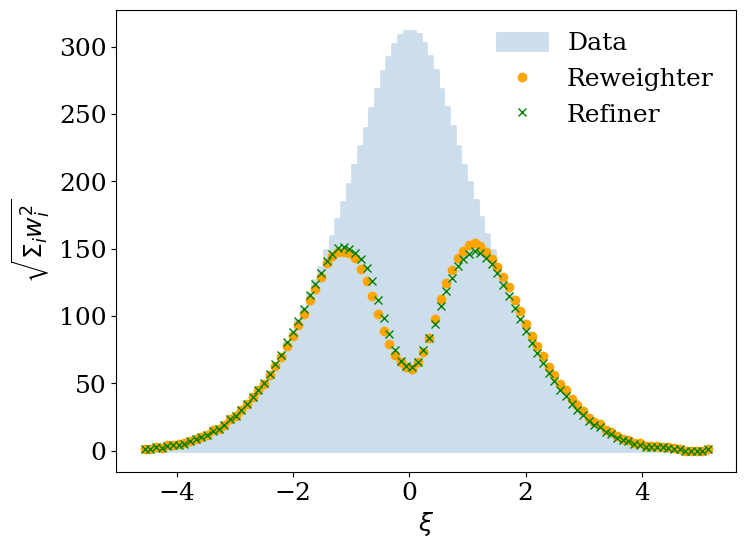

In [8]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner)

In [9]:
data_reweighter_resampled = resample(*data_reweighter)
data_refiner_resampled = resample(*data_refiner)
len(data_reweighter_resampled[0]), len(data_refiner_resampled[0])

(648984, 652586)

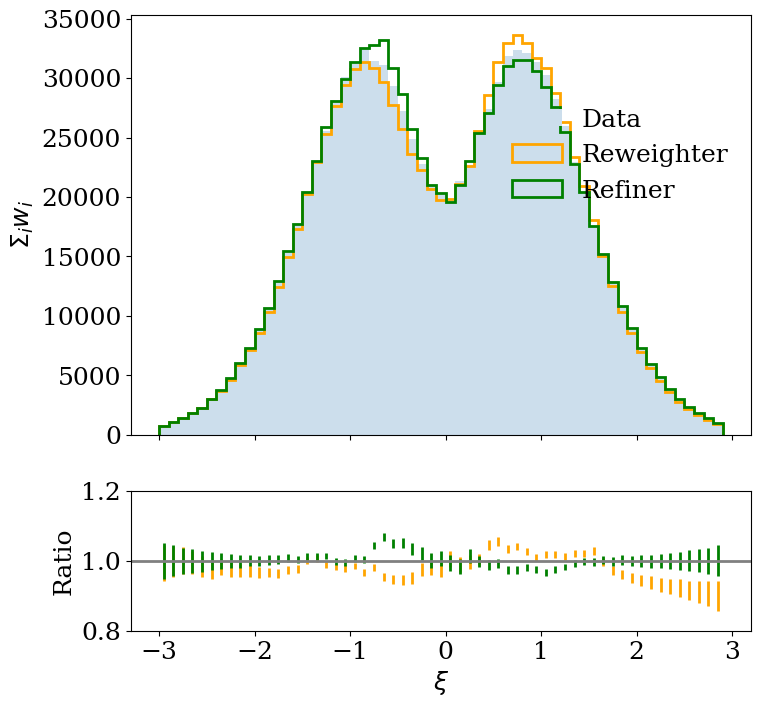

In [10]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins)

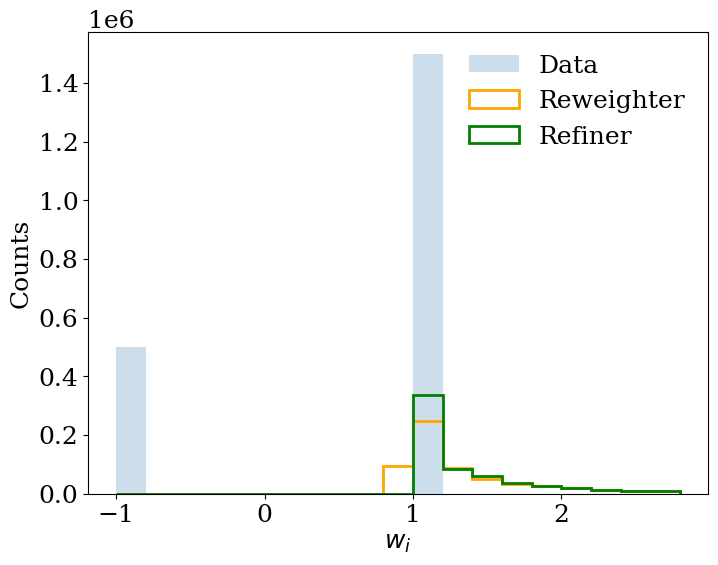

In [11]:
plot_w(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=np.arange(-1, 3.0, 0.2))

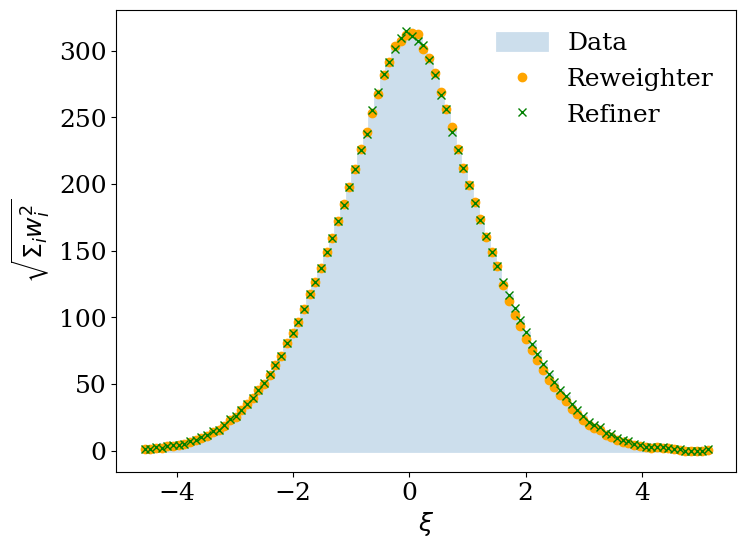

In [12]:
plot_w2(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled)